## Discussion #7

Files needed = None

OH: Mondays and Wednesdays 9:15-10:15am in 6473 Sewell Social Sciences

Email: minnie.cui@wisc.edu

**Reminder:** Coding practice #3 is uploaded!

### Exam Feedback

#### Common mistakes
Question 1A
- Choosing histograms over scatter/reg plot (we gave partial marks to bar plots)

Question 1B
- Only pointing out that different scales of two y-axis are confusing, suggesting unifying the scale
- How would you change it? Show off your knowledge of communicating a message with visualizations!

Question 2
- Not writing a function set up, only use for loop to solve the question
- Checking validity of the addresses
- Incorrect format of output and not knowing how to test the output

Question 3
- Not knowing how to use `header` and `skipfooter` (make sure you review documentation of commonly used functions)
- Not knowing how to check `dtype` of variables

Question 4
- Failed to import data
- Most failed to label the mean line -- review this! Hint: what do the first and second values refer to in `ax.text(-20, 15, 'mean')`?

Question 5
- Did not know how to deal with NaN values

#### Note:
If you answer a question manually (i.e. with no code), we deduct points.

### This week we saw:
- Time series
- APIs
- Aside: bar plots

### Time Series and APIs

This class is all about manipulating data to tell stories. Often times, we will see data over time, i.e., time series. Working with dates can be a little tricky, but the `datetime` package can help us. It allows us to create specific objects for dates rather than just using strings. Useful functions include `strftime` (converting a `datetime` to a formatted string) and `strptime` (which does the opposite). In `read_csv` and `read_excel`, the `parse_dates` option is used to automatically read in a date and `pd.to_datetime` converts a whole `Series` to a `datetime`. Another useful method is `resample('X').*` where `X` is the frequency of aggregation and `*` is a method of aggregation (`mean()`, `sum()`, etc.)

But, before we can actually do anything with time series, we need data! We've been working with CSV and Excel files that we've downloaded, but we can actually extract data directly from the Internet via application programming interfaces (APIs). This is very convenient so we don't have to download a ton of random files on our computers. We will frequently use `pandas_datareader` which is a package meant for connecting to APIs, but we can also query webpages directly using a url string. Other versions of APIs require payment and a key for access. 

In [1]:
# Import packages        API will be on exam 2
import datetime as dt

# Today
today = dt.datetime(2024, 3, 15)  
print('Today\'s date is:', today)
print('Today\'s date is:', today.strftime('%B %d, %Y'))

# From a string
today = dt.datetime.strptime('2024/03/15', '%Y/%m/%d')
print('Today\'s date is:', today.strftime('%B %d, %Y'))

Today's date is: 2024-03-15 00:00:00
Today's date is: March 15, 2024
Today's date is: March 15, 2024


In [4]:
#in datetime type
today = dt.datetime(2024,4,1)
print('today is:', today)

#datetime to string
print('today is:', today.strftime('%B %d, %Y'))


today is: 2024-04-01 00:00:00
today is: April 01, 2024


In [28]:
# Import packages
import pandas_datareader as web

# Collect data
banks = ['BAC', 'ASB', 'FFWM', 'WAL']
data = web.DataReader(banks, 'stooq', start='03-01-2019')['Close']   #closing value 
data = data / data.loc['03-01-2022']
data.head(10)

Symbols,BAC,ASB,FFWM,WAL
Date,,,,
2024-03-28,0.913662,0.945856,0.304693,0.732667
2024-03-27,0.911012,0.934863,0.299851,0.733010
2024-03-26,0.893664,0.902323,0.290165,0.701849
2024-03-25,0.888122,0.906720,0.294201,0.705388
2024-03-22,0.892700,0.904522,0.286937,0.708698
2024-03-21,0.903784,0.923870,0.305097,0.725020
2024-03-20,0.885472,0.914635,0.294604,0.703676
2024-03-19,0.868124,0.892209,0.266355,0.665781
2024-03-18,0.867642,0.881216,0.278462,0.660074


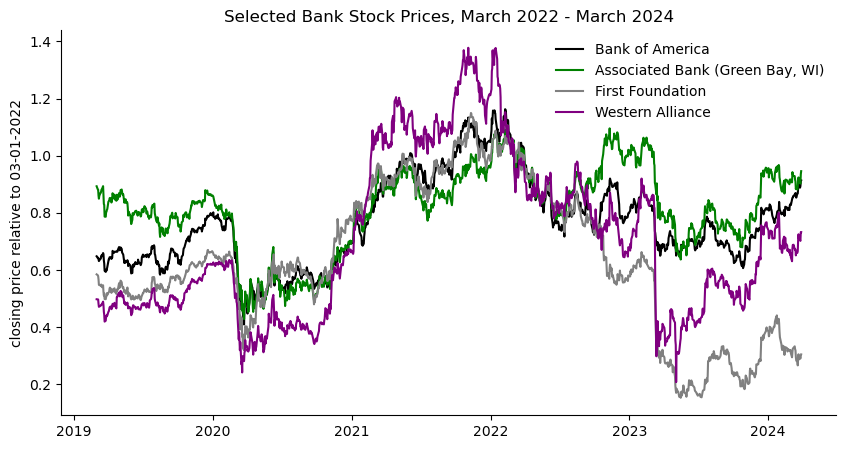

In [29]:
# Import packages
import matplotlib.pyplot as plt

# Helpful variables
fig, ax = plt.subplots(figsize=(10,5))
cols = ['black', 'green', 'grey', 'purple', 'blue', 'orange', 'red', 'magenta']
labels = ['Bank of America', 'Associated Bank (Green Bay, WI)', 
          'First Foundation', 'Western Alliance']

# Loop over banks and add to plot
for s, col, lab in zip(banks,  cols, labels):
    ax.plot(data.index, data[s], color=col, label=lab)

# Set labels
ax.set_ylabel('closing price relative to 03-01-2022')
ax.set_title('Selected Bank Stock Prices, March 2022 - March 2024')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Clean up
ax.legend(frameon=False)
plt.show()

### Bar Plots

Another useful type of plot is a barplot. We can efficiently tell a story with data with categorical variables using a bar plot where one axis represents a categorical variable and the other axis is a continuous variable. For example, let's look at our bank stock data. We want to see what proportion of days each stock was less than 50% of its original value. [This is a bit tricky with groups; we'll learn how to do this later]

In [22]:
# Get proportion of days less than 50% of value                  #understand stack and unstack for exam 2
stocks = data.stack().reset_index()
stocks.rename(columns={0 : 'Price'}, inplace=True)
stocks = stocks.groupby(['Symbols'])['Price'].apply(lambda x : 100 * (x <= 0.5).sum() / data.shape[0]).sort_values()      # divides by number of observation *100 
stocks

Symbols
BAC      1.954652
ASB      2.267396
FFWM    25.097733
WAL     31.743550
Name: Price, dtype: float64

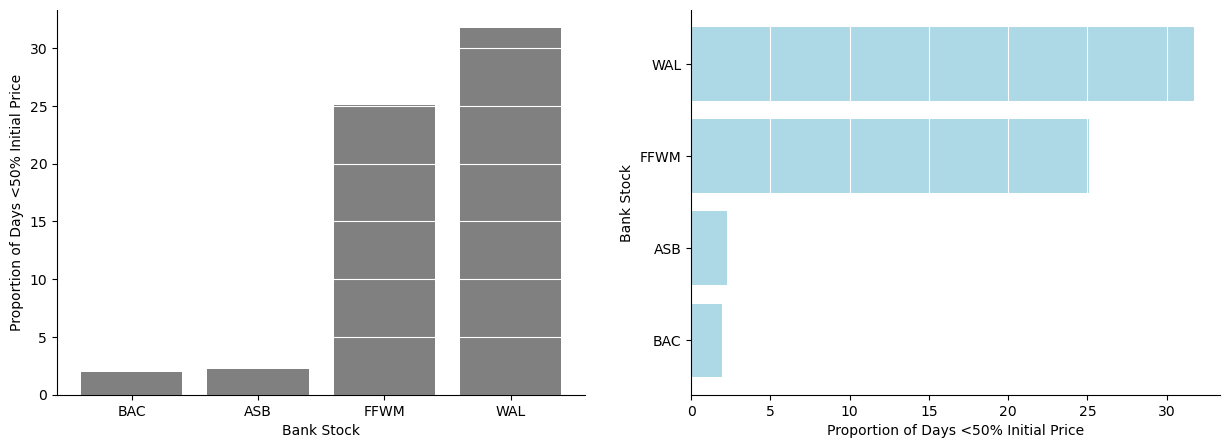

In [30]:
# Generate figure
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].bar(stocks.index, stocks, color='grey', alpha=1.0)     
axs[1].barh(stocks.index, stocks, color='lightblue', alpha=1.0)     

# Add labels
axs[0].set_ylabel('Proportion of Days <50% Initial Price')
axs[1].set_xlabel('Proportion of Days <50% Initial Price')
axs[0].set_xlabel('Bank Stock')
axs[1].set_ylabel('Bank Stock')

# Other options: grids
axs[0].grid(axis='y', color='white')
axs[1].grid(axis='x', color='white')

# Remove spines
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
plt.show()

In [34]:
# Let's look at the example from lecture.
# How would we select just the region California? Hint: look at the commented query line
# How would we get multiple years of data?
# Make a barplot showing the percentage of hospitals with secure patient messaging 
# for Wisconsin, California, and Colorado
# 
# Documentation: https://www.healthit.gov/data/api

# Import libraries
import requests
import pandas as pd

# Useful variables
base_url = 'https://www.healthit.gov/data/open-api?'
source = 'aha.csv'
period = '2015'
region = 'California'

# query = base_url + 'source=' + source + '&region=' + region + '&period=' + period
query = base_url + 'source=' + source + '&period=' + period
print(query)

# Query API
response = requests.get(query)
print(response)

https://www.healthit.gov/data/open-api?source=aha.csv&period=2015
<Response [200]>


In [45]:
data = response.json()
data_df = pd.DataFrame.from_dict(data, orient='index')
data_df

,region,region_code,period,pct_hospitals_cehrt,pct_hospitals_cehrt_2015,pct_hospitals_find_clinical_info,pct_hospitals_send_clinical_info,pct_hospitals_receive_clinical_info,pct_hospitals_integrate_scr,pct_hospitals_send_receive_find_integrate,...,pct_hospitals_share_labs_any_outside_provs,pct_hospitals_share_labs_any_outside_hospitals,pct_hospitals_share_labs_any_outside_ambu_provs,pct_hospitals_patients_ecopy_ehr,pct_hospitals_patients_ecopy_discharge_instr,pct_hospitals_share_care_summaries_any_outside_provs,pct_hospitals_share_care_summaries_any_outside_hospitals,pct_hospitals_share_care_summaries_any_outside_ambu_provs,pct_hospitals_patients_secure_message,pct_hospitals_integrate_any_clinical_info
208,National,US,2015,0.96,,0.52,0.85,0.65,0.38,,...,0.756440799,0.634754457,0.692381132,,,0.760139994,0.672368019,0.686530541,0.63,0.5
209,Alaska,AK,2015,1,,0.89,1,0.89,0.51,,...,0.767077064,0.660710855,0.660710855,,,0.879915162,0.773548953,0.773548953,0.620241332,0.51
210,Alabama,AL,2015,0.966172229,,0.36,0.82,0.64,0.44,,...,0.779040616,0.556978179,0.726470324,,,0.771392956,0.743919156,0.636346972,0.514452936,0.52
211,Arkansas,AR,2015,0.953456843,,0.4,0.86,0.58,0.54,,...,0.705619425,0.536098714,0.652206494,,,0.671019899,0.567970189,0.617606968,0.647203208,0.68
212,Arizona,AZ,2015,0.961077809,,0.37,0.57,0.24,0.11,,...,0.583220401,0.425043104,0.583220401,,,0.554030876,0.496926683,0.501981785,0.484585562,0.16
213,California,CA,2015,0.950717653,,0.49,0.83,0.48,0.22,,...,0.705897324,0.560737519,0.666979897,,,0.724365457,0.604734545,0.645315645,0.58154043,0.37
214,Colorado,CO,2015,1,,0.63,0.95,0.83,0.63,,...,0.815090133,0.791580688,0.766767192,,,0.857665909,0.857665909,0.83990363,0.79585803,0.7
215,Connecticut,CT,2015,0.952270331,,0.42,0.95,0.6,0.36,,...,0.612554295,0.266011763,0.612554295,,,0.666343578,0.266011763,0.666343578,0.48822363,0.56
216,District Of Columbia,DC,2015,1,,0.67,0.82,0.61,0.15,,...,0.822836137,0.668848164,0.822836137,,,0.822836137,0.822836137,0.822836137,0.668848164,0.3
217,Delaware,DE,2015,1,,0.83,0.83,0.83,0.5,,...,1,1,1,,,0.833333288,0.833333288,0.833333288,0.500000157,0.83


In [32]:
data = response.json()
data_df = pd.DataFrame.from_dict(data)

# Keep columns
colnames = ['region', 'pct_hospitals_cehrt', 
            'pct_hospitals_basic_ehr_notes', 
            'pct_hospitals_find_clinical_info', 
            'pct_hospitals_patients_secure_message']
data_df = data_df[colnames]

# Convert to numeric
for k in colnames:
    if k != 'region':
        data_df[k] = data_df[k].astype(float)
data_df

# Generate figure
states = ['Wisconsin', 'California', 'Colorado']
state_df = data_df[data_df['region'].isin(states)]
fig, ax = plt.subplots(figsize=(10,5)) 
ax.bar(state_df.region, state_df.pct_hospitals_patients_secure_message, color='grey', alpha=1.0)     

# Add labels
ax.set_xlabel('State')
ax.set_ylabel('Perc. hospitals w/ secure messaging')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


https://www.healthit.gov/data/open-api?source=aha.csv&period=2015


KeyError: "None of [Index(['region', 'pct_hospitals_cehrt', 'pct_hospitals_basic_ehr_notes',\n       'pct_hospitals_find_clinical_info',\n       'pct_hospitals_patients_secure_message'],\n      dtype='object')] are in the [columns]"

## Have a great weekend!